# LAB 1
## Load Data and visualize
In this Lab you will load measurements from a text file<br>
We could do it by hands but we will use the library pandas. It is a powerful tool for timeseries processing but it is however not efficient for real-time application. <br>
First let's import required libraries.

In [19]:
import os, sys
import pandas
import numpy as np
from datetime import datetime, timedelta
import pytz
import matplotlib.pyplot as plt

## Read a measurement csv file

### old school way
open file <br>
parse file

### pandas
A csv file can be read directly using pandas. Dates can be parsed directly when the format is standard. In our case, hour is given as decimal which is not a supported standard. It required then to do it in two commands.

In [20]:
Data=pandas.read_csv('DATA/BSRN_PAY_1MIN_2005.csv',delimiter=';',comment='#',header=None,names=['Year','Month','Day','UT','GHI','DHI','BNI','T2','RH'])

Visualise the first rows of the results

In [21]:
Data[0:10]

,Year,Month,Day,UT,GHI,DHI,BNI,T2,RH
0,2005,1,1,0.016667,-1.0,0.0,-999.0,0.0,100.0
1,2005,1,1,0.033333,-1.0,0.0,-999.0,0.0,100.0
2,2005,1,1,0.050000,-1.0,0.0,-999.0,0.0,100.0
3,2005,1,1,0.066667,-1.0,-1.0,-999.0,0.0,100.0
4,2005,1,1,0.083333,-1.0,-1.0,-999.0,0.0,100.0
5,2005,1,1,0.100000,-1.0,-1.0,-999.0,0.0,100.0
6,2005,1,1,0.116667,-1.0,-1.0,-999.0,0.0,100.0
7,2005,1,1,0.133333,-1.0,-1.0,-999.0,0.0,100.0
8,2005,1,1,0.150000,-1.0,-1.0,-999.0,0.0,100.0
9,2005,1,1,0.166667,-1.0,-1.0,-999.0,0.0,100.0


As said previously the time is not in a standard format the following lines convert UT time to Hour Minute

In [22]:
#Data['Hour']=Data['UT'].astype(int)
Data.insert(3,'Hour',Data['UT'].astype(int))
Data.insert(4,'Minutes',np.round((Data['UT']*60) % 60).astype(int))
Data.drop(columns='UT',inplace=True)

In [23]:
Data.head()

,Year,Month,Day,Hour,Minutes,GHI,DHI,BNI,T2,RH
0,2005,1,1,0,1,-1.0,0.0,-999.0,0.0,100.0
1,2005,1,1,0,2,-1.0,0.0,-999.0,0.0,100.0
2,2005,1,1,0,3,-1.0,0.0,-999.0,0.0,100.0
3,2005,1,1,0,4,-1.0,-1.0,-999.0,0.0,100.0
4,2005,1,1,0,5,-1.0,-1.0,-999.0,0.0,100.0


Now that it is standard, it can be converted to datetime format.

In [24]:
Data['Datetime']=pandas.to_datetime(Data[['Year','Month','Day','Hour','Minutes']],utc=True)

Check the regularity of the time stamps <br>
Should be 1 min

In [25]:
np.mean(Data['Datetime'].diff())

Timedelta('0 days 00:01:00')

In [26]:
np.std(Data['Datetime'].diff())

Timedelta('0 days 00:00:00')

Set datetime as index

In [27]:
Data.set_index('Datetime',drop=True,inplace=True)

Create a 1-min date vector starting at 20050101T00:01:00Z and ending at 20051231T24:00

In [28]:
tzinfo=pytz.timezone('utc')
date_begin=datetime(2005,1,1,0,tzinfo=tzinfo)
date_end=datetime(2005,12,31,0,0,tzinfo=tzinfo)
complete_index=pandas.date_range(date_begin+timedelta(minutes=1),date_end+timedelta(days=1),freq='min',tz='utc')

In [29]:
Data.reindex(complete_index)

,Year,Month,Day,Hour,Minutes,GHI,DHI,BNI,T2,RH
2005-01-01 00:01:00+00:00,2005,1,1,0,1,-1.0,0.0,-999.0,0.0,100.0
2005-01-01 00:02:00+00:00,2005,1,1,0,2,-1.0,0.0,-999.0,0.0,100.0
2005-01-01 00:03:00+00:00,2005,1,1,0,3,-1.0,0.0,-999.0,0.0,100.0
2005-01-01 00:04:00+00:00,2005,1,1,0,4,-1.0,-1.0,-999.0,0.0,100.0
2005-01-01 00:05:00+00:00,2005,1,1,0,5,-1.0,-1.0,-999.0,0.0,100.0
2005-01-01 00:06:00+00:00,2005,1,1,0,6,-1.0,-1.0,-999.0,0.0,100.0
2005-01-01 00:07:00+00:00,2005,1,1,0,7,-1.0,-1.0,-999.0,0.0,100.0
2005-01-01 00:08:00+00:00,2005,1,1,0,8,-1.0,-1.0,-999.0,0.0,100.0
2005-01-01 00:09:00+00:00,2005,1,1,0,9,-1.0,-1.0,-999.0,0.0,100.0
2005-01-01 00:10:00+00:00,2005,1,1,0,10,-1.0,-1.0,-999.0,0.0,100.0


In [30]:
Data=Data.replace(-999,np.nan)

Acces date where data is missing

In [31]:
Data.index[Data.isnull().any(axis=1)]

DatetimeIndex(['2005-01-01 00:01:00+00:00', '2005-01-01 00:02:00+00:00',
               '2005-01-01 00:03:00+00:00', '2005-01-01 00:04:00+00:00',
               '2005-01-01 00:05:00+00:00', '2005-01-01 00:06:00+00:00',
               '2005-01-01 00:07:00+00:00', '2005-01-01 00:08:00+00:00',
               '2005-01-01 00:09:00+00:00', '2005-01-01 00:10:00+00:00',
               ...
               '2005-12-31 23:51:00+00:00', '2005-12-31 23:52:00+00:00',
               '2005-12-31 23:53:00+00:00', '2005-12-31 23:54:00+00:00',
               '2005-12-31 23:55:00+00:00', '2005-12-31 23:56:00+00:00',
               '2005-12-31 23:57:00+00:00', '2005-12-31 23:58:00+00:00',
               '2005-12-31 23:59:00+00:00', '2006-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datetime', length=279863, freq=None)

Plot values. First import matplotlib. In Jupyter there is a shortcut for importing all you need: %pylab inline <br>
Be careful it replaces all the import you made before see under

Text(0.5, 0, 'Date')

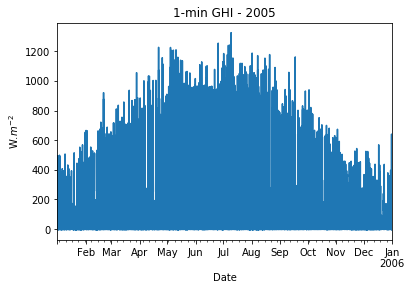

In [32]:
Data['GHI'].plot(title='1-min GHI - 2005')
plt.ylabel(r'W.$m^{-2}$')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

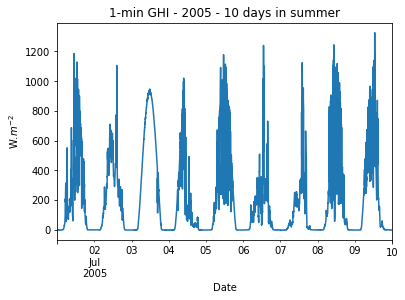

In [33]:
Data['GHI'].loc[(Data.index >datetime(2005,7,1,tzinfo=tzinfo)) & (Data.index <= datetime(2005,7,10,tzinfo=tzinfo))].plot(title='1-min GHI - 2005 - 10 days in summer')
plt.ylabel(r'W.$m^{-2}$')
plt.xlabel('Date')

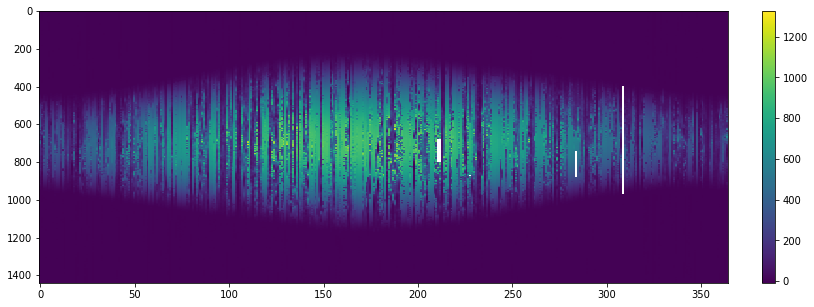

In [34]:
days=pandas.date_range(date_begin,date_end,freq='D')
nb_days=len(days)
nb_min=1440
GHI=np.reshape(Data.GHI.values,(nb_days,nb_min))
plt.figure(figsize=(15,5))
plt.imshow(np.transpose(GHI),aspect=.1)
plt.colorbar(fraction=0.046, pad=0.04)

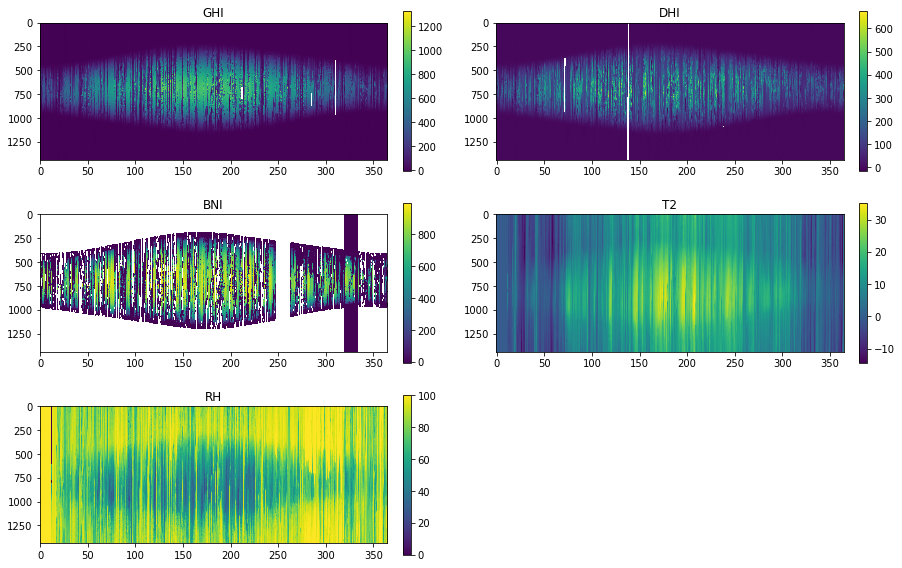

In [35]:
plt.figure(figsize=(15,10))
for i,k in enumerate(['GHI', 'DHI', 'BNI', 'T2', 'RH']):
    plt.subplot(3,2,i+1)
    dat=np.reshape(Data[k].values,(nb_days,nb_min))
    plt.imshow(np.transpose(dat),aspect=.1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title(k)

# LAB 2
## Call web services 
In this Lab you will call web services to obtain solar position or top of atmosphere irradiance for example<br>
For readability purposes the functions has been coded outside this notebook. It can be found in python_functions directory. By default this directory is not known by jupyter. We need to add it to path.

In [2]:
module_path = os.path.abspath(os.path.join('python_functions'))
if module_path not in sys.path:
    sys.path.append(module_path)

Import the wps module which contains all the call functions

In [3]:
import wps

Call the SG2 functions to obtain solar position

In [38]:
location=[46.815000, 6.944000, 491]
try:
    SG2=pandas.read_pickle('SG2.zip')
except:
    SG2=wps.wps_SG2(location,date_begin+timedelta(seconds=30),date_end+timedelta(days=1)-timedelta(seconds=30),1/60.)
    SG2.to_pickle('SG2.zip')

Set index to the SG2 dataframe (you should not do it this way normally) and merge it to the Data Dataframe

In [486]:
SG2=SG2.set_index(complete_index).drop(['JDUT','YYYY','MM','DD','H','DOY'],axis=1)
Data=Data.merge(SG2, left_index=True, right_index=True)
Data.head()

,Year,Month,Day,Hour,Minutes,GHI,DHI,BNI,T2,RH,DELTA,OMEGA,GAMMA_S0,ALPHA_S,R
Datetime,,,,,,,,,,,,,,,
2005-01-01 00:01:00+00:00,2005,1,1,0,1,-1.0,0.0,NaN,0.0,100.0,-0.401657,57538.377855,-1.146309,0.244209,0.983449
2005-01-01 00:02:00+00:00,2005,1,1,0,2,-1.0,0.0,NaN,0.0,100.0,-0.401656,57538.382216,-1.145572,0.253783,0.983449
2005-01-01 00:03:00+00:00,2005,1,1,0,3,-1.0,0.0,NaN,0.0,100.0,-0.401655,57538.386578,-1.144808,0.263329,0.983449
2005-01-01 00:04:00+00:00,2005,1,1,0,4,-1.0,-1.0,NaN,0.0,100.0,-0.401654,57538.390940,-1.144017,0.272845,0.983449
2005-01-01 00:05:00+00:00,2005,1,1,0,5,-1.0,-1.0,NaN,0.0,100.0,-0.401653,57538.395302,-1.143198,0.282331,0.983449


In [487]:
#to free memory
del(SG2)

In [488]:
SG2_GAMMAS = np.reshape(Data.GAMMA_S0.values,(nb_days,nb_min))# solar elevation in radian
Data['THETAS']= np.pi/2 - Data.GAMMA_S0# solar zenithal angle in radian
SG2_ALPHAS = np.reshape(Data.ALPHA_S.values,(nb_days,nb_min))# solar azimuth angle
SG2_DAY = (SG2_GAMMAS > 0);

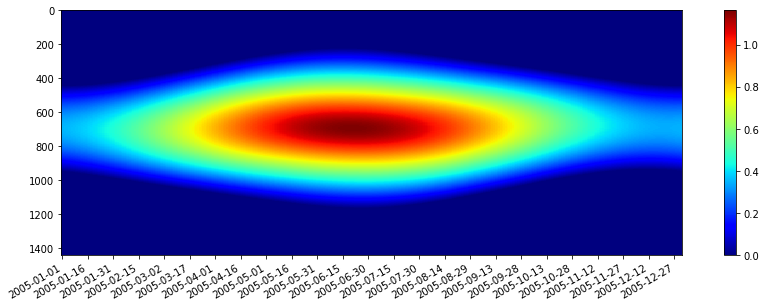

In [489]:
fig=plt.figure(figsize=(15,5))
jet = plt.cm.jet
plt.imshow(np.transpose(SG2_GAMMAS*SG2_DAY),aspect=.1,cmap=jet)
plt.xticks(range(0,365,15),days[::15].strftime('%Y-%m-%d'))
fig.autofmt_xdate()

plt.colorbar()

In [490]:
try:
    CAMS=pandas.read_pickle('CAMS.zip')
except:
    CAMS=wps.wps_CAMS_RAD(location,date_begin,date_end,1./60,'alexandre.boilley@transvalor.com')
    CAMS.to_pickle('CAMS.zip')

In [491]:
CAMS=CAMS.set_index(complete_index)
Data=Data.merge(CAMS, left_index=True, right_index=True,suffixes=('','_CAMS'))

In [492]:
Data.head()

,Year,Month,Day,Hour,Minutes,GHI,DHI,BNI,T2,RH,...,TOA,CLEAR_SKY_GHI,CLEAR_SKY_BHI,CLEAR_SKY_DHI,CLEAR_SKY_BNI,GHI_CAMS,BHI,DHI_CAMS,BNI_CAMS,Reliability
Datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:01:00+00:00,2005,1,1,0,1,-1.0,0.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:02:00+00:00,2005,1,1,0,2,-1.0,0.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:03:00+00:00,2005,1,1,0,3,-1.0,0.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:04:00+00:00,2005,1,1,0,4,-1.0,-1.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2005-01-01 00:05:00+00:00,2005,1,1,0,5,-1.0,-1.0,NaN,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
